# **Neural Networks using MNIST**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

physical_devices=tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ",len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num GPUs Available:  1


### **Loading Dataset :-**

In [2]:
# 28 x 28 images of Handwritten digits 0-9
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

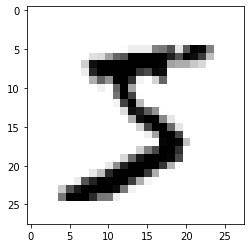

In [3]:
# print(x_train[0])
plt.imshow(x_train[0],cmap = plt.cm.binary)
plt.show()

##### **Normalizing/Scaling the Data :-**

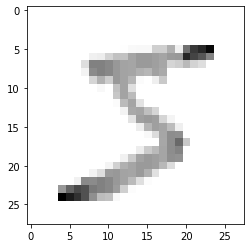

In [4]:
# The pixels vary from 0-255. Normalizing the images divides the data by 255.
x_train = tf.keras.utils.normalize(x_train,axis=1)
y_test = tf.keras.utils.normalize(x_test,axis=1)

# Normalizing the data makes it easier for a network to learn
plt.imshow(x_train[0],cmap = plt.cm.binary)
plt.show()

# The digits appear lighter. 

### **Building the Model :-**

In [5]:
# Sequential Model is a basic feed forward model
model = tf.keras.models.Sequential()

# Our images are 28 x 28 matrices. We can't use them as input unless its a Conv2D layer.
# We have to convert them into a 1D array using np.reshape() or Flatten() from tf.keras.layers()
# The first layer is going to be the input layer.

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# We have 2 hidden layer having 128 neurons each, a single layer would map our output to a linear NN.
# A neural network having 2 or more hidden layers is called Deep Neural Network.
# The activation function for output layer will be sigmoid since we want to output probabilities.



In [10]:
# Defining parameters for training of model.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### **Training the Model :-**

In [12]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2636 - accuracy: 0.9219
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1077 - accuracy: 0.9667
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0733 - accuracy: 0.9767
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0532 - accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0419 - accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0320 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0248 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0213 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0170 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0

### **Validating the Model :-**

In [17]:
# Validating the Model is very essential to check if our model overfitted/underfitted.
# val_loss, val_acc = model.evaluate(x_test,y_test,verbose=0)
# print(val_loss, val_acc)